In [1]:
#ignore this cell please

from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks/ITS Labs/Lab 06/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/ITS Labs/Lab 06


In [0]:
# Initialisation
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Compute absolute colour difference of two images.
# The two images must have the same size.
# Return combined absolute difference of the 3 channels 

def absDiff(image1, image2):
	if image1.shape != image2.shape:
		print('image size mismatch')
		return 0
	else:
		height,width,dummy = image1.shape
		# Compute absolute difference.
		diff = cv2.absdiff(image1, image2)
		a = cv2.split(diff)
		# Sum up the differences of the 3 channels with equal weights.
		# You can change the weights to different values.
		sum = np.zeros((height,width), dtype=np.uint8)
		for i in (1, 2, 3):
			ch = a[i-1]
			cv2.addWeighted(ch, 1.0/i, sum, float(i-1)/i, gamma=0.0, dst=sum)
		return sum

(-0.5, 1023.5, 767.5, -0.5)

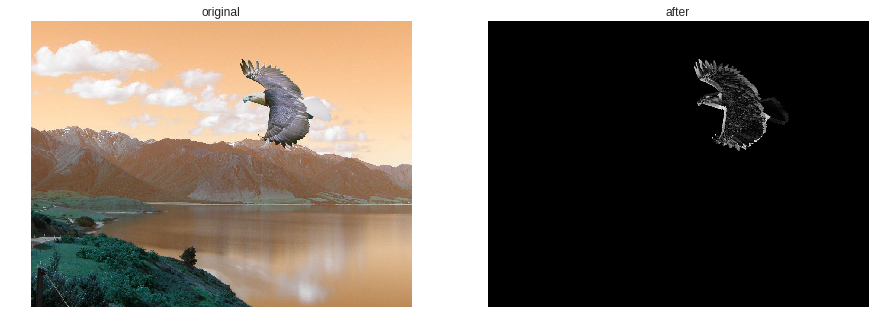

In [4]:
#calling the absdiff for eagle image set


# Initialisation
filename1 = "eagle-1.jpg"
filename2 = "eagle-2.jpg"

# Load images
image1 = cv2.imread(filename1)
image2 = cv2.imread(filename2)

# Compute colour difference and remove background
diff_eagle = absDiff(image1, image2)



#plotting the results for eagle set, note i have used imshow instead imwrite
plt.figure(figsize=(15, 10), facecolor='white')

plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('original')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(diff_eagle, 'gray')
plt.title('after')
plt.axis("off")

(-0.5, 639.5, 479.5, -0.5)

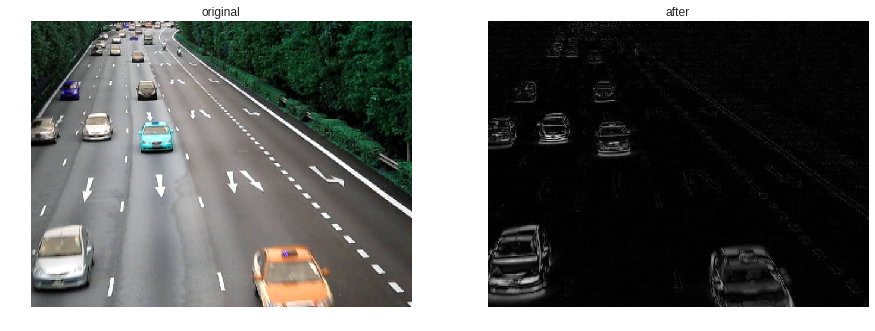

In [5]:
##calling the absdiff for traffic image set

# Initialisation
filename3 = "traffic-1.bmp"
filename4 = "traffic-2.bmp"

# Load images
image3 = cv2.imread(filename3)
image4 = cv2.imread(filename4)

# Compute colour difference and remove background
diff_traffic = absDiff(image3, image4)


#plotting the results for traffic set, note i have used imshow instead imwrite
plt.figure(figsize=(15, 10), facecolor='white')

plt.subplot(1, 2, 1)
plt.imshow(image3)
plt.title('original')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(diff_traffic, 'gray')
plt.title('after')
plt.axis("off")

In [0]:
#the new function as in the question

def setBackground(image, diff, threshold, bgcolor):
  
  #passing diff as the source and get the mask as the destination using given arguments
  ret, mask = cv2.threshold(diff, threshold, 1, cv2.THRESH_BINARY)
  
  #get a copy of the original image to fg
  fg = image.copy()
  
  #replace fg values where background is equal to given bgcolor
  fg[mask!=1] = bgcolor
  
  #returning fg
  return fg

In [0]:
#calling the setBackground function for eagle
eagle_fg = setBackground(image1, diff_eagle, 10, (0, 0, 0))

#calling the setBackground function for traffic
traffic_fg = setBackground(image3, diff_traffic, 10, (0, 0, 0))

(-0.5, 1023.5, 767.5, -0.5)

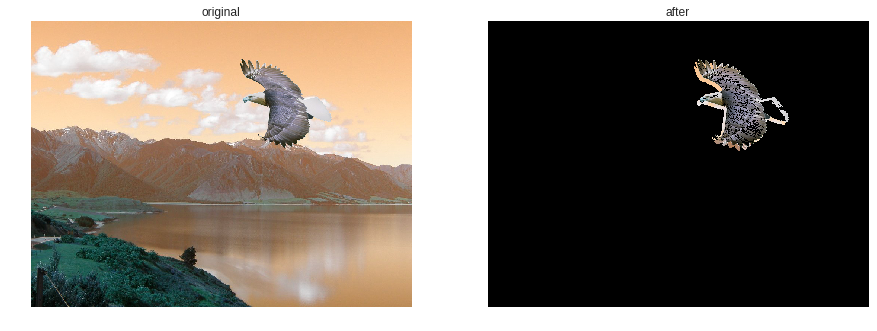

In [8]:
#plotting the results for eagle, note i have used imshow instead imwrite

plt.figure(figsize=(15, 10), facecolor='white')

plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('original')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(eagle_fg)
plt.title('after')
plt.axis("off")


#its a background removed rgb image of eagle

(-0.5, 639.5, 479.5, -0.5)

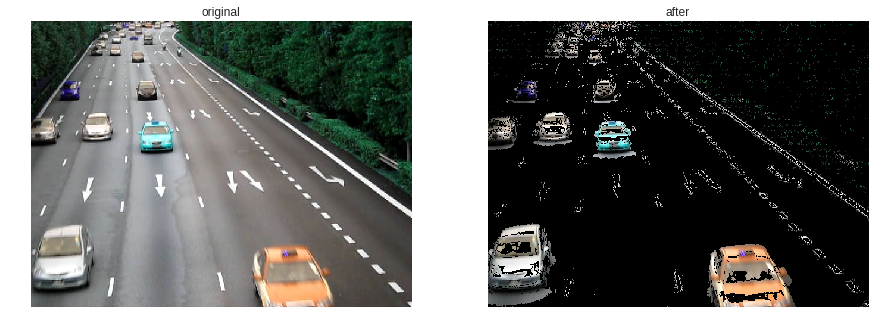

In [9]:
#plotting the results for traffic, note i have used imshow instead imwrite

plt.figure(figsize=(15, 10), facecolor='white')

plt.subplot(1, 2, 1)
plt.imshow(image3)
plt.title('original')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(traffic_fg)
plt.title('after')
plt.axis("off")

#its a background removed rgb image of traffic, also i see some noise in the bg removed image